In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow, fig_arrow
from pyfonts import load_google_font
from pypalettes import load_cmap

import warnings
warnings.filterwarnings("ignore")

In [3]:
in_path = r"..\data\imports_clean.csv"
imports = pd.read_csv(in_path)
df_in = imports.copy()

In [ ]:
commodity = "Petroleum Oils And Oils Obtained From Bituminous Minerals Crude"
sources = ["Russia", "Iran", "Saudi Arab", "U Arab Emts", "Iraq", "U S A"]
clean_names = {
    "Russia":"Russia",
    "Iran":"Iran",
    "Saudi Arab":"Saudi Arabia",
    "U Arab Emts":"United Arab Emirates",
    "Iraq":"Iraq",
    "U S A":"United States of America"
}

clean_titles = {
    "Russia":"Russia",
    "Iran":"Iran",
    "Saudi Arabia":"Saudi Arabia",
    "United Arab Emirates":"UAE",
    "Iraq":"Iraq",
    "United States of America":"USA"
}
y_min = 2011
y_max = 2023

petro_dict = {}

years = pd.Series(range(y_min, y_max + 1), name="Year")

df = df_in[df_in["Commodity"]==commodity].copy()

for source in sources:
    # Sum by year in case there are multiple rows per year
    yearly = df.loc[df["Source"] == source, ["Year", "Import (Lakh INR)"]].groupby("Year", as_index=False)["Import (Lakh INR)"].sum()

    # Ensure full Year range and fill gaps with 0
    out = years.to_frame().merge(yearly, on="Year", how="left").fillna({"Import (Lakh INR)": 0})

    petro_dict[clean_names.get(source)] = {
        "Year": out["Year"].astype(int),                      
        "Import": out["Import (Lakh INR)"].astype(float)      
    }


In [5]:
import_values = []
max_hits = []  # (country, year_of_max, max_value)

for country, d in petro_dict.items():
    imp = pd.Series(d["Import"]).astype(float)
    yrs = pd.Series(d["Year"]).astype(int)

    # position of the first max
    pos = imp.idxmax()
    max_val = imp.iloc[pos]
    max_year = int(yrs.iloc[pos])

    import_values.append(max_val)
    max_hits.append((country, max_year, max_val))

    print(f"Country: {country} -> Min = {imp.min()}; Max = {max_val} in {max_year}")

# overall max (country, year, value)
overall_country, overall_year, overall_val = max(max_hits, key=lambda x: x[2])
print(f"\nOverall max = {overall_val} in {overall_year} ({overall_country})")

y_lim_max = int(np.round(overall_val + 100))


Country: Russia -> Min = 0.0; Max = 38490444.75 in 2023
Country: Iran -> Min = 0.0; Max = 8428038.32 in 2018
Country: Saudi Arabia -> Min = 7958116.34; Max = 23345132.17 in 2022
Country: United Arab Emirates -> Min = 3564085.63; Max = 13468542.7 in 2022
Country: Iraq -> Min = 7004069.63; Max = 26882407.62 in 2022
Country: United States of America -> Min = 0.0; Max = 8214213.55 in 2022

Overall max = 38490444.75 in 2023 (Russia)


In [6]:
def import_at(petro_dict, country, year, default=0):
    years = petro_dict[country]["Year"].astype(int).values
    vals  = petro_dict[country]["Import"].values
    s = pd.Series(vals, index=years)
    return s.get(int(year), default)

In [7]:
# Fonts
rb_condensed_b = load_google_font("Roboto Condensed", weight=500)
rb_condensed_b_light = load_google_font("Roboto Condensed", weight=300)
rb_condensed_b_light_i = load_google_font("Roboto Condensed", weight=300, italic=True)

# Font size
f_s_title = 79
f_s_subtitle = 30
f_s_annot = 18

# Colors
bg = "#F4F1EA"
bg_sub = "#F8F6F2"
line_color = "#811844"
annot_color = "#3C3C3C"
annot_bullet = "#662222"
annot_special_color = "#C3922F"
title_color = "#2C2C2C"

line_colors = {
    "Russia": "#B22222",          # Deep crimson – sanctions era surge
    "Saudi Arabia": "#C5A14E",    # Golden sand – oil wealth & stability
    "Iraq": "#755139",            # Earthy brown – steady post-2016 rise
    "Iran": "#5B5B5B",            # Charcoal gray – muted under sanctions
    "United Arab Emirates": "#007C91",  # Teal blue – strategic partnership
    "United States of America": "#2E5AAC"  # Steel blue – new energy trade
}


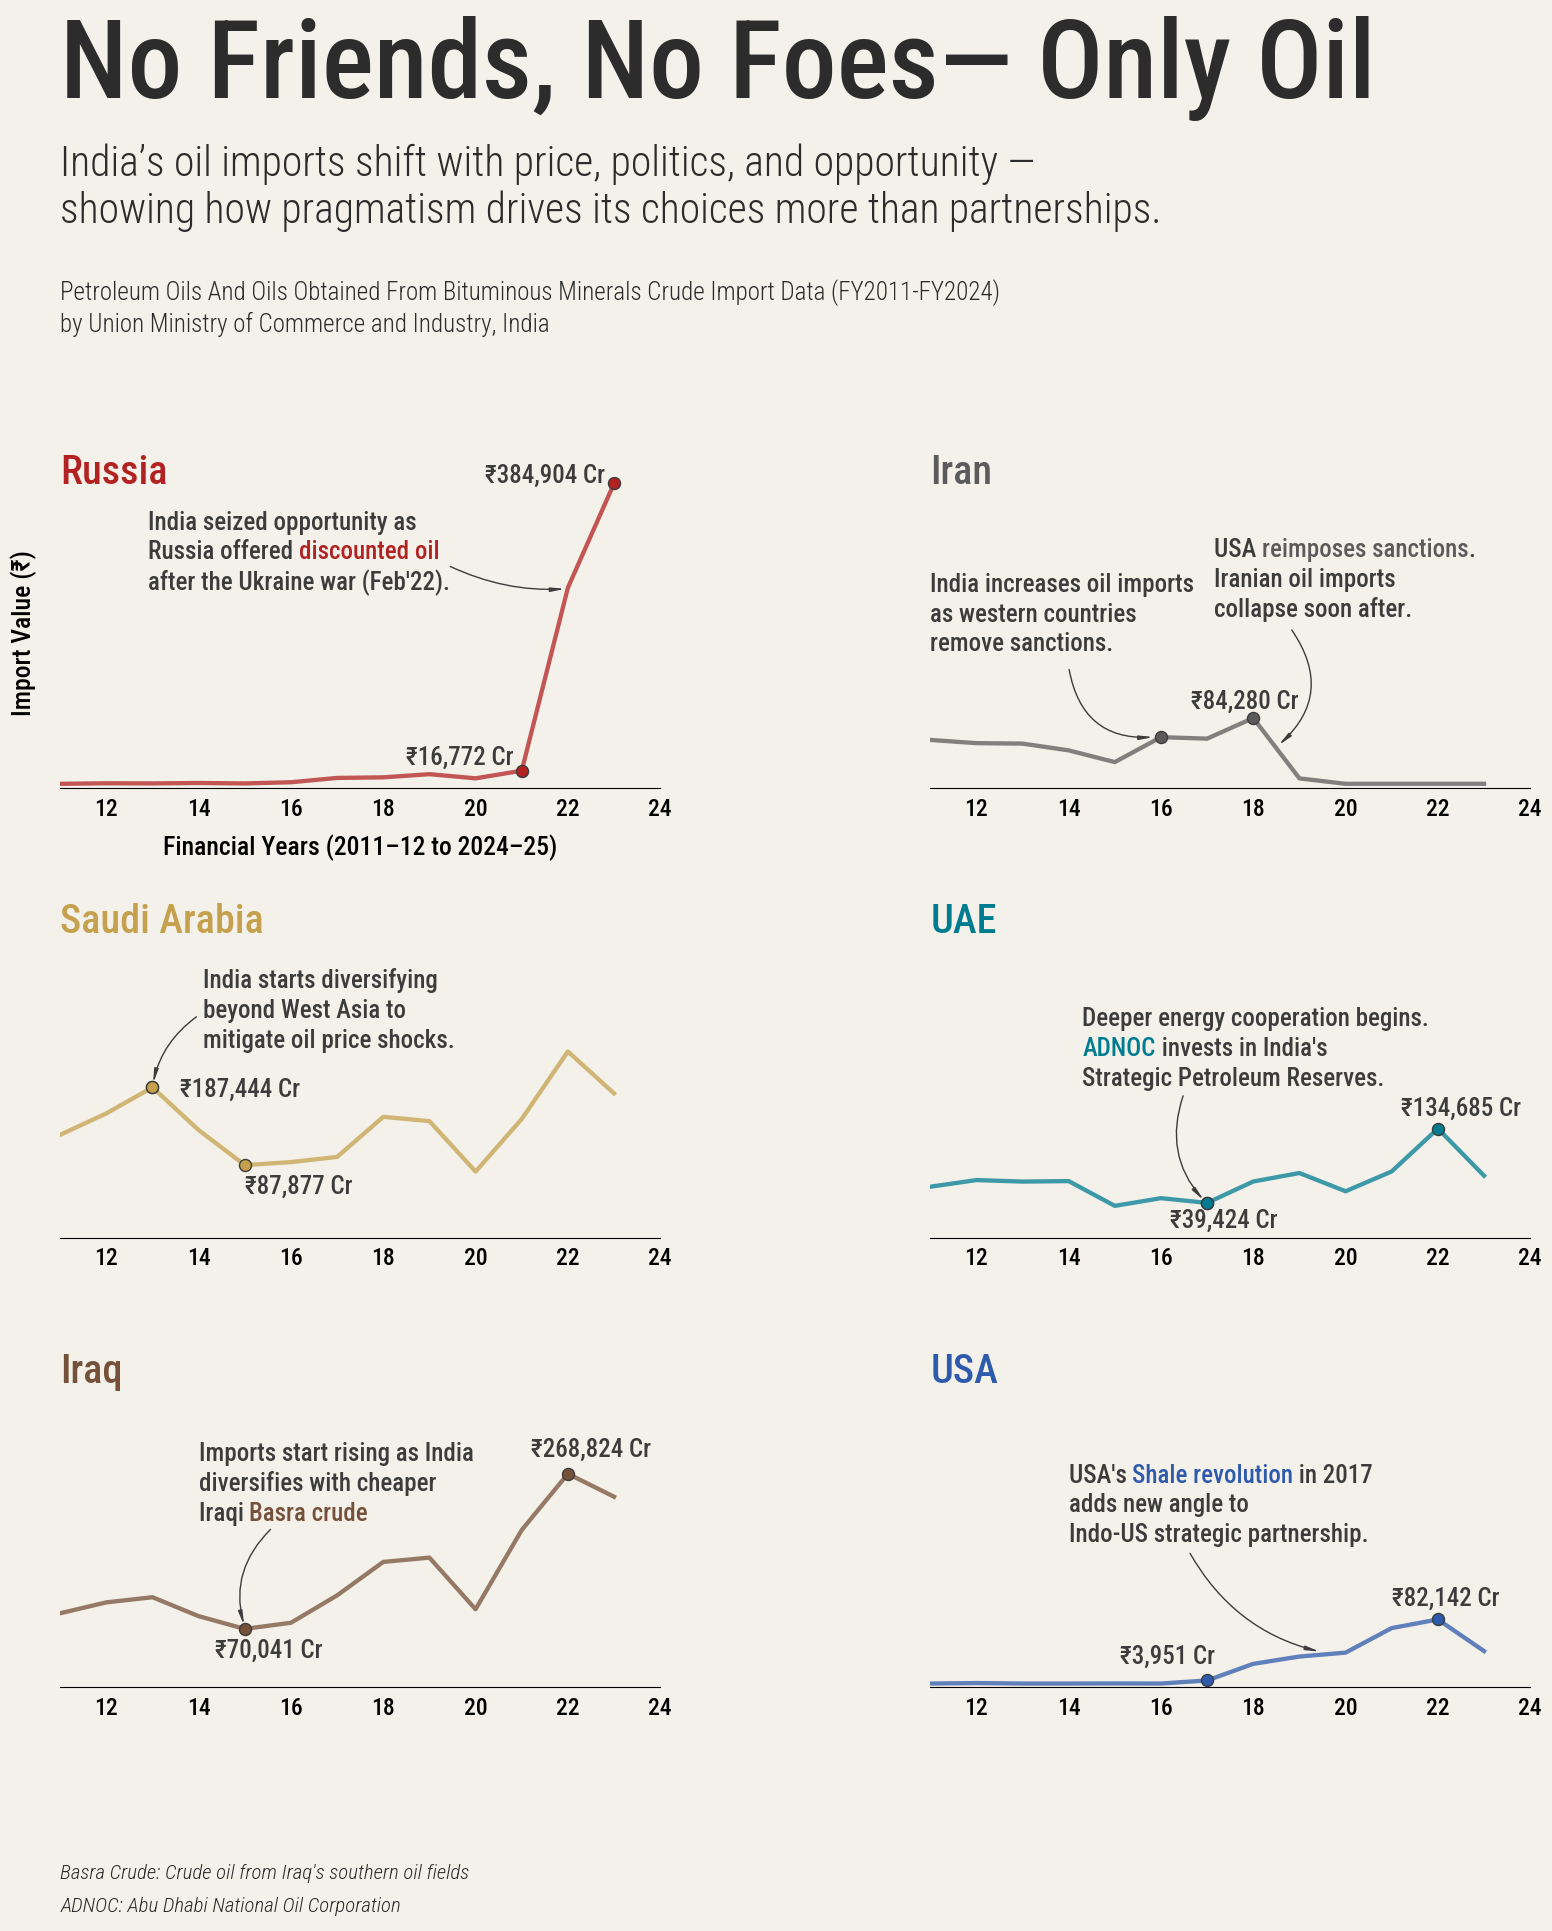

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 22), gridspec_kw={"wspace": 0.45, "hspace": 0.45})

fig.subplots_adjust(left=0.15, right=0.85, top=0.7, bottom=0.15)

fig.set_facecolor(bg)

# Title, Subtitle, Credits, Explanations
fig_text(s="No Friends, No Foes— Only Oil", x=0.15, y=0.91, ha="left",
         size=f_s_title, font=rb_condensed_b, color=title_color)

fig_text(s="India’s oil imports shift with price, politics, and opportunity —\nshowing how pragmatism drives its choices more than partnerships.", x=0.15, y=.852, ha="left",
         size=f_s_subtitle, font=rb_condensed_b_light, color=title_color)

fig_text(s="Petroleum Oils And Oils Obtained From Bituminous Minerals Crude Import Data (FY2011-FY2024)\nby Union Ministry of Commerce and Industry, India",
         x=0.15, y=.79, ha="left",
         size=f_s_annot, font=rb_condensed_b_light, color=title_color)

fig_text(s="Basra Crude: Crude oil from Iraq's southern oil fields", x=0.15, y=.070, ha="left",
         size=f_s_annot-3, font=rb_condensed_b_light_i, color=title_color)

fig_text(s="ADNOC: Abu Dhabi National Oil Corporation", x=0.15, y=.055, ha="left",
         size=f_s_annot-3, font=rb_condensed_b_light_i, color=title_color)



# Clean up canvas
for a in ax.flatten():
    a.spines[["top", "right", "left"]].set_visible(False)
    a.tick_params(left=False, bottom=False)
    a.set_xticks(ticks=[2012, 2014, 2016, 2018, 2020, 2022, 2024], labels=["12", "14", "16", "18", "20", "22", "24"],
                 fontproperties=rb_condensed_b, size=17)
    a.set_yticklabels([])
    a.set_xlabel("")
    a.set_ylabel("")
    a.margins(y=0.1)
    a.margins(x=0.02)
    a.set_facecolor(bg)      
    a.patch.set_alpha(0.8)
    a.set_xlim(y_min, y_max+1)
    a.set_ylim(-500000, y_lim_max*1.02)


# Plot each city in each subplot
for i, (country, a) in enumerate(zip(petro_dict.keys(), ax.flatten())):
    
    years = petro_dict[country]["Year"]
    imports = petro_dict[country]["Import"]

    a.plot(years, imports, color=line_colors[country], alpha=0.75, linewidth=3.1)

    ax_text(s=clean_titles.get(country), x=2011, y=y_lim_max*1.1, font=rb_condensed_b, size=29, color=line_colors[country], ax=a)

    if country == "Iran":
        # Arrow showing U.S. reimposes sanctions (May 2018); Iranian oil imports to India collapse soon after
        ax_arrow(tail_position=(2018.8, 20000000),
                 head_position=(2018.5, 4700000)
                 , radius=-0.45, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="USA <reimposes sanctions>.\nIranian oil imports\ncollapse soon after.",
                x=2017.15, y=31500000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a,
                highlight_textprops=[dict(color=line_colors[country])])
        # Country: Iran -> Min = 0.0; Max = 8428038.32 in 2018
        val_iran_cr = 8428038.32/100
        a.scatter(2018, 8428038.32, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_iran_cr:,.0f} Cr", x=2016.65, y=12000000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)

        # JCPOA
        a.scatter(2016, 5976670.31, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_arrow(head_position=(2015.9, 6000000), tail_position=(2014, 15000000),
                 radius=0.45, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="India increases oil imports\nas western countries\nremove sanctions.",
                x=2011, y=27000000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a)
    
    elif country == "Russia":
        # Arrow showing rise of imports after Western countries impose sanctions on Russia post-Russia-Ukraine war
        ax_arrow(tail_position=(2019.4, 28000000),
                 head_position=(2022, 25000000)
                 , radius=0.13, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="India seized opportunity as\nRussia offered <discounted oil>\nafter the Ukraine war (Feb'22).",
                x=2012.9, y=35000000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a,
                highlight_textprops=[dict(color=line_colors[country])])
        # Country: Russia -> Min = 0.0; Max = 38490444.75 in 2023
        val_russia_cr = 38490444.75/100
        a.scatter(2023, 38490444.75, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_russia_cr:,.0f} Cr", x=2020.2, y=41000000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
        # 2021 = 1677228.44
        val_russia_cr_2021 = 1677228/100
        a.scatter(2021, 1677228, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_russia_cr_2021:,.0f} Cr", x=2018.5, y=4900000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)

        a.set_ylabel("Import Value (₹)", fontdict=dict(font=rb_condensed_b, size=18.5), labelpad=10)
        a.set_xlabel("Financial Years (2011–12 to 2024–25)", fontdict=dict(font=rb_condensed_b, size=18.5), labelpad=10)

    elif country == "United States of America":
        # Arrow showing rise of imports after 2017 Shale-boom in USA
        ax_arrow(tail_position=(2016.6, 17000000),
                 head_position=(2019.5, 4000000)
                 , radius=0.22, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="USA's <Shale revolution> in 2017\nadds new angle to\nIndo-US strategic partnership.",
                x=2014, y=28200000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a,
                highlight_textprops=[dict(color=line_colors[country])])
        # Country: United States of America -> Min = 0.0; Max = 8214213.55 in 2022
        val_usa_cr = 8214213.55/100
        a.scatter(2022, 8214213.55, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_usa_cr:,.0f} Cr", x=2021, y=12400000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)

        # 2017 = 395079.01
        val_usa_cr_2017 = 395079.01/100
        a.scatter(2017, 395079.01, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_usa_cr_2017:,.0f} Cr", x=2015.12, y=5000000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
    
    elif country == "Saudi Arabia":
        # 18744358.05
        a.scatter(2013, 18744358.05, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_arrow(tail_position=(2014, 28000000),
                 head_position=(2013, 18900000)
                 , radius=0.2, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        # Imports dip as India diversifies to Latin & African suppliers
        ax_text(s="India starts diversifying\nbeyond West Asia to\nmitigate oil price shocks.",
                x=2014.1, y=34000000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a)
        
        # 2013 = 18744358.05
        val_saudi_cr_1 = 18744358.05/100
        a.scatter(2013, 18744358.05, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_saudi_cr_1:,.0f} Cr", x=2013.6, y=20000000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
        # 2015 = 8787712.59
        val_saudi_cr_2 = 8787712.59/100
        a.scatter(2015, 8787712.59, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_saudi_cr_2:,.0f} Cr", x=2015, y=7500000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
        
    elif country == "Iraq":
        # # Before Basra Crude 7004069.63
        val_iraq_basra_cr = 7004069.63/100
        a.scatter(2015, 7004069.63, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_iraq_basra_cr:,.0f} Cr", x=2014.35, y=5700000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
        ax_arrow(tail_position=(2015.6, 20000000),
                 head_position=(2015, 7100000)
                 , radius=0.3, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="Imports start rising as India\ndiversifies with cheaper\nIraqi <Basra crude>",
                x=2014, y=31000000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a,
                highlight_textprops=[dict(color=line_colors[country])])
        # Max = 26882407.62 in 2022
        val_iraq_cr = 26882407.62/100
        a.scatter(2022, 26882407.62, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_iraq_cr:,.0f} Cr", x=2021.2, y=31500000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)

    elif country == "United Arab Emirates":
        # 2017 = 3942362.69
        a.scatter(2017, 3942362.69, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_arrow(tail_position=(2016.5, 18000000),
                 head_position=(2016.97, 4000000)
                 , radius=0.3, ax=a, fill_head=True, head_width=1.2, color=annot_color)
        ax_text(s="Deeper energy cooperation begins.\n<ADNOC> invests in India's\nStrategic Petroleum Reserves.",
                x=2014.3, y=29000000, ha="left", font=rb_condensed_b, size=f_s_annot, color=annot_color, ax=a,
                highlight_textprops=[dict(color=line_colors[country])])
        
        # 2017 = 3942362.69
        val_uae_cr_2017 = 3942362.69/100
        a.scatter(2017, 3942362.69, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_uae_cr_2017:,.0f} Cr", x=2016.2, y=3150000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)
        # 2022 = 13468542.7
        val_uae_cr_2022 = 13468542.7/100
        a.scatter(2022, 13468542.7, marker="o", zorder=10, color=line_colors[country], edgecolors=annot_color, s=75)
        ax_text(s=f"₹{val_uae_cr_2022:,.0f} Cr", x=2021.2, y=17500000, ax=a, font=rb_condensed_b, size=f_s_annot, color=annot_color)




dpi = 200
plt.savefig(r"..\viz\oil.png", dpi=dpi, pad_inches=2)

---